<font size=5>**Handwriting using Convolutional Neural Network**</font>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

%matplotlib inline

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<font size=3>**Load digits dataset**</font>

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print ("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)


X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


<font size=3>**Display one handwritten sample**</font>

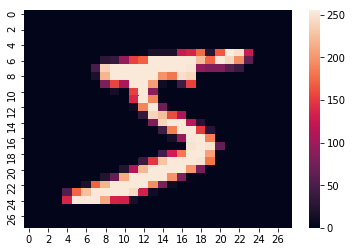

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(X_train[0])

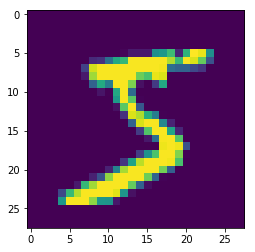

In [4]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

<font size=3>**Preprocessing dataset (normalizing)**</font>

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print ("X_train preprocessed shape: ", X_train.shape)

X_train preprocessed shape:  (60000, 28, 28, 1)


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

<font size=3>**Convert 1-dimensional class arrays to 10-dimensional class matrices**</font>

In [7]:
## Using to_categorical
#Y_train = np_utils.to_categorical(y_train, 10)
#Y_test = np_utils.to_categorical(y_test, 10)

#print (Y_train[0])

In [8]:
# Using LabelBinarizer
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.fit([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Y_train = lb.transform(y_train)
Y_test = lb.transform(y_test)

print(Y_train.shape)
print (Y_train[0])

(60000, 10)
[0 0 0 0 0 1 0 0 0 0]


<font size=3>**Define model architecture**</font>

In [10]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


<font size=3>**Compile model**</font>

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<font size=3>**Fit model using training datas**</font>

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2055 - acc: 0.9370
Epoch 2/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0844 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0654 - acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0533 - acc: 0.9836
Epoch 5/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0472 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0408 - acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0358 - acc: 0.9890
Epoch 8/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0328 - acc: 0.9897
Epoch 9/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0299 - acc: 0.9903
Epoch 10/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0286 - a

<font size=3>**Evaluate the model**</font>

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 7s 699us/step
[0.027048512840766443, 0.9924]
